In [4]:
import pandas
import ast
import os
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt

In [2]:
project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\movies.csv")
df = pandas.read_csv(data_path, encoding = "ISO-8859-1")

#___________________________________________________________________
#___________________________________________________________________
t = ['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History', 'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western', 'TV Movie']
categories = np.zeros((len(df),20), dtype=int)
for y in range (len(df)):
    s=df['genres'][y]
    if not s == '[]' and not pandas.isnull(s):
        s=s[1:-1]
        s = ast.literal_eval(s)
        if not isinstance(s, dict):
            for m in range(len(s)):    
                if s[m]['name'] in t:
                    categories[y][t.index(s[m]['name'])]=1
        else:
            categories[y][t.index(s['name'])]=1

#___________________________________________________________________               
#___________________________________________________________________
c = []
for y in range (len(df)):
    s=df['spoken_languages'][y]
    if not s == '[]' and not pandas.isnull(s):
        s=s[1:-1]
        s = ast.literal_eval(s)
        if not isinstance(s, dict):
            for m in range(len(s)):    
                if s[m]['name'] not in c:
                    c.append((s[m]['name']))
c.append('Bokmål')                
languages = np.zeros((len(df),75), dtype=int)
for y in range (len(df)):
    s=df['spoken_languages'][y]
    if not s == '[]' and not pandas.isnull(s):
        s=s[1:-1]
        s = ast.literal_eval(s)
        if not isinstance(s, dict):
            for m in range(len(s)):    
                if s[m]['name'] in c:
                    languages[y][c.index(s[m]['name'])]=1
        else:
            languages[y][c.index(s['name'])]=1

#___________________________________________________________________               
#___________________________________________________________________
adult = np.zeros((len(df)),dtype=int)
for y in range (len(df)):
    s=df['adult'][y]
    if s == 'True':
        adult[y]=1

#___________________________________________________________________               
#___________________________________________________________________
inCollection = np.zeros((len(df)),dtype=int)
for y in range (len(df)):
    s=df['belongs_to_collection'][y]
    if not s == 'nan':
        inCollection[y]=1


#___________________________________________________________________               
#___________________________________________________________________
budget = np.zeros((len(df)),dtype=float)
for y in range (len(df)):
    s=df['budget'][y]
    if not s == '[]' and not pandas.isnull(s):
        budget[y] = float(s)
mean = np.mean(budget)
budget  = (budget-mean)
budget = budget/np.max(budget) 
#___________________________________________________________________               
#___________________________________________________________________
popularity = np.zeros((len(df)),dtype=float)
for y in range (len(df)):
    s=df['popularity'][y]
    if not s == '[]' and not pandas.isnull(s):
        popularity[y] = float(s)
mean = np.mean(popularity)
popularity  = (popularity-mean)
popularity = popularity/np.max(popularity)  
#___________________________________________________________________               
#___________________________________________________________________
runTime = np.zeros((len(df)),dtype=float)
for y in range (len(df)):
    s=df['runtime'][y]
    if not np.isnan(s):
        runTime[y] = float(s)
mean = np.mean(runTime)
runTime  = (runTime-mean)
runTime = runTime/np.max(runTime)  
#___________________________________________________________________               
#___________________________________________________________________
voteCount = np.zeros((len(df)),dtype=float)
for y in range (len(df)):
    s=df['vote_count'][y]
    if not np.isnan(s):
        voteCount[y] = float(s)

mean = np.mean(voteCount)
voteCount  = (voteCount-mean)
voteCount = voteCount/np.max(voteCount)

#___________________________________________________________________               
#___________________________________________________________________
average = np.zeros((len(df)),dtype=float)
for y in range (len(df)):
    s=df['vote_average'][y]
    if not np.isnan(s):
        average[y] = float(s)

#___________________________________________________________________               
#___________________________________________________________________

date = np.zeros((len(df)),dtype=float)
for y in range (len(df)):
    s=df['release_date'][y]
    if not isinstance(s, float):
        s = s[-4:]
        date[y] = float(s)
mean = np.mean(date)
date  = (date-mean)
date = date/np.max(date)
       



x = np.zeros((len(df),102),dtype=float)

for Id in range (len(df)):
    for cat in range(20):
        x[Id][cat]=categories[Id][cat]
    for lan in range(75):
        x[Id][lan+20]=languages[Id][lan]
    x[Id][95]=adult[Id]
    x[Id][96]=inCollection[Id]
    x[Id][97]=budget[Id]
    x[Id][98]=popularity[Id]
    x[Id][99]=runTime[Id]
    x[Id][100]=voteCount[Id]
    x[Id][101]=date[Id]

In [21]:
error=[]
numOfDim =[]
for i in range (1000):
    tX = np.transpose(x)
    xTx = np.dot(tX,x)
    left = np.add(xTx,(i*0.1+0.01)*np.identity(102))
    b = np.dot(np.linalg.inv(left),tX) 
    b = np.dot(b,average) 
    error.append(np.sum(average - np.dot(x,b)))
    # Get movieId - movieFeatureVector array from data
    threshold = max(b) / 50
    c = np.where(abs(b) > threshold)[0]
    numOfDim.append(len(c))
    #x_reduced = x[:, c]

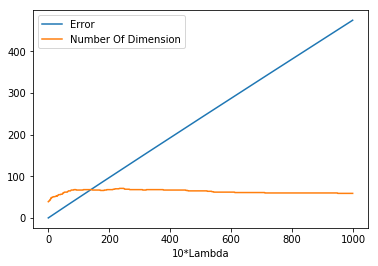

In [22]:
plt.plot(error,label='Error')
plt.plot(numOfDim,label='Number Of Dimension')
plt.xlabel('10*Lambda')
plt.legend(loc='upper left')
plt.show()

In [26]:
tX = np.transpose(x)
xTx = np.dot(tX,x)
left = np.add(xTx,(50*0.1+0.01)*np.identity(102))
b = np.dot(np.linalg.inv(left),tX) 
b = np.dot(b,average) 

error.append(np.sum(average - np.dot(x,b)))
# Get movieId - movieFeatureVector array from data
threshold = max(b) / 50
c = np.where(abs(b) > threshold)[0]
numOfDim.append(len(c))
x_reduced = x[:, c]

In [27]:
movie_features = []
for index, row in df.iterrows():
    movie_features.append([row['movieId'], x_reduced[index]])

In [ ]:
file = open("movie_features", "wb")
pickle.dump(movie_features, file)